#### 22649011 Ngo Hong Thong

In [22]:
!pip install folium


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Lab 03 - Trực quan dữ liệu địa lý

### Bài 1

1. Cho `district-boundary-hcm-city.geojson`. Dùng geopandas để đọc và hiển thị dữ liệu dạng
polygon

2. Đọc dữ liệu trong sheet `location của file HCMC_location. => tìm hiểu dữ liệu location

3. Vẽ scatterplot gồm lat.long của dữ liệu của câu 2

4. Kết hợp polygon ở câu 1 và scatterplot ở câu 3 để vẽ thành một biểu đồ chung

Skipping field rpath: unsupported OGR type: 5


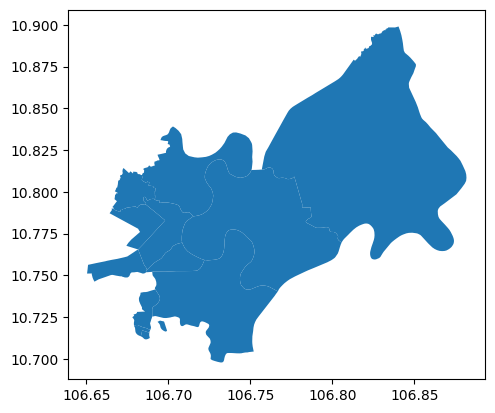

   STT   ID          Name          Bourough  Postal cost   Latitude  \
0    1  760        Quận 1   Vietnam, Quan 1          NaN  10.775659   
1    2  761       Quận 12  Vietnam, Quan 12          NaN  10.867153   
2    3  762  Quận Thủ Đức  Vietnam, Thu Duc          NaN  10.849409   
3    4  763        Quận 9   Vietnam, Quan 9          NaN  10.842840   
4    5  764   Quận Gò Vấp   Vietnam, Go Vap          NaN  10.838678   

    Longitude  Population  Population_all  Avg_land_price  
0  106.700424     193.632          193632        59852096  
1  106.641332     510.326          510326         3505942  
2  106.753705     528.413          528413         5249286  
3  106.828685     290.620          290620         3337584  
4  106.665290     634.146          634146         9873267  


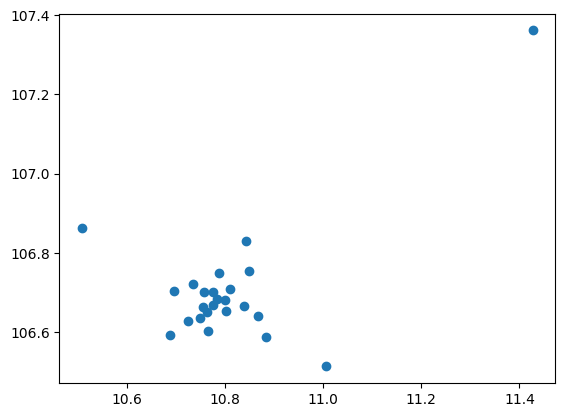

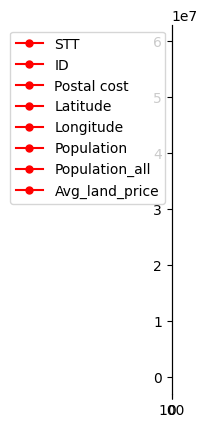

In [23]:
'''### Bài 1

1. Cho `district-boundary-hcm-city.geojson`. Dùng geopandas để đọc và hiển thị dữ liệu dạng
polygon

2. Đọc dữ liệu trong sheet `location của file HCMC_location. => tìm hiểu dữ liệu location

3. Vẽ scatterplot gồm lat.long của dữ liệu của câu 2

4. Kết hợp polygon ở câu 1 và scatterplot ở câu 3 để vẽ thành một biểu đồ chung'''
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# 1. Cho `district-boundary-hcm-city.geojson`. Dùng geopandas để đọc và hiển thị dữ liệu dạng polygon
district_boundary = gpd.read_file('data/district-boundary-hcm-city.geojson')
district_boundary.plot()
plt.show()

# 2. Đọc dữ liệu trong sheet `location của file HCMC_location. => tìm hiểu dữ liệu location
location = pd.read_excel('data/HCMC_location.xlsx', sheet_name='Location')
print(location.head())

# 3. Vẽ scatterplot gồm lat.long của dữ liệu của câu 2
plt.scatter(location['Latitude'], location['Longitude'])
plt.show()

# 4. Kết hợp polygon ở câu 1 và scatterplot ở câu 3 để vẽ thành một biểu đồ chung
fig, ax = plt.subplots()
district_boundary.plot(ax=ax)
location.plot(ax=ax, color='red', marker='o', markersize=5)
plt.show()

### Bài 2

Dữ liệu `Canada.xlsx` chứa thông tin nhập cư vào Canada từ năm 1980 đến năm 2013. Bộ dữ liệu chứa dữ liệu hàng năm về dòng người di cư đến Canada được ghi nhận, trình bày thông tin inflows and outflows theo nơi sinh, quốc tịch hoặc nơi cư trú trước đó / tiếp theo cho cả người nước ngoài và quốc tịch. Chúng tôi sẽ tập trung vào dữ liệu nhập cư Canada

#### Map

1. Hiển thị bản đồ thế giới

2. Tạo bản đồ với center là Canada (location=[56.130, -106.35]) và zoom level (zoom_start=4)

3. Tạo Stamen Toner map với center là Canada với zoom level là 4.

4. Tạo Stamen Terrain với center là Canada với zoom level là 4.

5. Tạo Mapbox Bright Map với center là Canada with zoom level 6

#### Choropleth Map

1. Đọc dữ liệu `Canada.xlsx` và gán vào df_can, tìm hiểu về dữ liệu với: describe, head, shape,
columns

2. Làm sạch dữ liệu: bỏ đi những cột không cần thiết như 'AREA','REG','DEV','Type','Coverage'
đổi tên cho một số cột 'OdName' => 'Country', 'AreaName' => 'Continent', 'RegName' => 'Region'. Để nhất quán tạo tên tất cả các cột trong dữ liệu là kiểu string. Thêm cột total chứa tổng lượng nhập cư các năm

3. Xem thông tin dữ liệu lúc này: head, shape

4. Tạo danh sách các năm từ 1980 đến 2013.

5. Lấy file GeoJSON có tên là `world_countries.json`

6. tạo world map, với center [0, 0] là latitude và longitude, zoom level là 2, sử dụng tiles là Mapbox Bright

7. Tạo choropleth map sử dụng total nhập cư của từng quốc gia vào Canada từ năm 1980 đến
năm 2013

8. Chỉnh threshold = 0 thay cho threshold = -6,918, tạo lại choropleth map sử dụng total nhập cư
của từng quốc gia vào Canada từ năm 1980 đến năm 2013

In [24]:
'''### Bài 2

Dữ liệu `Canada.xlsx` chứa thông tin nhập cư vào Canada từ năm 1980 đến năm 2013. Bộ dữ liệu chứa dữ liệu hàng năm về dòng người di cư đến Canada được ghi nhận, trình bày thông tin inflows and outflows theo nơi sinh, quốc tịch hoặc nơi cư trú trước đó / tiếp theo cho cả người nước ngoài và quốc tịch. Chúng tôi sẽ tập trung vào dữ liệu nhập cư Canada

#### Map

1. Hiển thị bản đồ thế giới

2. Tạo bản đồ với center là Canada (location=[56.130, -106.35]) và zoom level (zoom_start=4)

3. Tạo Stamen Toner map với center là Canada với zoom level là 4.

4. Tạo Stamen Terrain với center là Canada với zoom level là 4.

5. Tạo Mapbox Bright Map với center là Canada with zoom level 6

#### Choropleth Map

1. Đọc dữ liệu `Canada.xlsx` và gán vào df_can, tìm hiểu về dữ liệu với: describe, head, shape,
columns

2. Làm sạch dữ liệu: bỏ đi những cột không cần thiết như 'AREA','REG','DEV','Type','Coverage'
đổi tên cho một số cột 'OdName' => 'Country', 'AreaName' => 'Continent', 'RegName' => 'Region'. Để nhất quán tạo tên tất cả các cột trong dữ liệu là kiểu string. Thêm cột total chứa tổng lượng nhập cư các năm

3. Xem thông tin dữ liệu lúc này: head, shape

4. Tạo danh sách các năm từ 1980 đến 2013.

5. Lấy file GeoJSON có tên là `world_countries.json`

6. tạo world map, với center [0, 0] là latitude và longitude, zoom level là 2, sử dụng tiles là Mapbox Bright

7. Tạo choropleth map sử dụng total nhập cư của từng quốc gia vào Canada từ năm 1980 đến
năm 2013

8. Chỉnh threshold = 0 thay cho threshold = -6,918, tạo lại choropleth map sử dụng total nhập cư
của từng quốc gia vào Canada từ năm 1980 đến năm 2013'''

import folium
import json

# 1. Hiển thị bản đồ thế giới
world_map = folium.Map(location=[0, 0], zoom_start=2)
world_map


---

In [25]:

# 2. Tạo bản đồ với center là Canada (location=[56.130, -106.35]) và zoom level (zoom_start=4)
canada_map = folium.Map(location=[56.130, -106.35], zoom_start=4)
canada_map

In [26]:

# 3. Tạo Stamen Toner map với center là Canada với zoom level là 4.
canada_center = [56.1304, -106.3468]  # Latitude and Longitude for Canada's center

map_canada = folium.Map(
    location=canada_center,
    zoom_start=4
)

folium.TileLayer(
    'https://stamen-tiles.a.ssl.fastly.net/toner/{z}/{x}/{y}.png',
    attr='Map tiles by Stamen Design, under CC BY 3.0. Data by OpenStreetMap, under ODbL.',
    name='Stamen Toner',
    control=False
).add_to(map_canada)

map_canada.save('canada_stamen_toner_map.html')

map_canada

In [27]:

# 4. Tạo Stamen Terrain với center là Canada với zoom level là 4.
canada_center = [56.130, -106.35]

canada_map = folium.Map(
    location=canada_center,
    zoom_start=4,
    tiles='Stamen Terrain',  # Using Stamen Terrain tiles
    attr='Map tiles by Stamen Design, under CC BY 3.0. Data by OpenStreetMap, under ODbL.'
)

canada_map.save('canada_stamen_terrain_map.html')
canada_map = folium.Map(location=canada_center, zoom_start=4, tiles='OpenStreetMap')
canada_map

In [29]:

# 1. Đọc dữ liệu `Canada.xlsx` và gán vào df_can, tìm hiểu về dữ liệu với: describe, head, shape, columns
df_can = pd.read_excel('data/Canada.xlsx', sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)
print(df_can.describe())
print(df_can.head())
print(df_can.shape)
print(df_can.columns)


             AREA          REG         DEV          1980          1981  \
count  195.000000   195.000000  195.000000    195.000000    195.000000   
mean   912.764103  1249.015385  901.753846    508.394872    566.989744   
std     13.082835  1185.526885    0.431878   1949.588546   2152.643752   
min    903.000000   905.000000  901.000000      0.000000      0.000000   
25%    903.000000   914.000000  902.000000      0.000000      0.000000   
50%    908.000000   922.000000  902.000000     13.000000     10.000000   
75%    922.000000   925.500000  902.000000    251.500000    295.500000   
max    935.000000  5501.000000  902.000000  22045.000000  24796.000000   

               1982          1983          1984         1985         1986  \
count    195.000000    195.000000    195.000000   195.000000   195.000000   
mean     534.723077    387.435897    376.497436   358.861538   441.271795   
std     1866.997511   1204.333597   1198.246371  1079.309600  1225.576630   
min        0.000000      

In [30]:

# 2. Làm sạch dữ liệu: bỏ đi những cột không cần thiết như 'AREA','REG','DEV','Type','Coverage' đổi tên cho một số cột 'OdName' => 'Country', 'AreaName' => 'Continent', 'RegName' => 'Region'. Để nhất quán tạo tên tất cả các cột trong dữ liệu là kiểu string. Thêm cột total chứa tổng lượng nhập cư các năm
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_can.rename(columns={'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Region'}, inplace=True)
df_can['Total'] = df_can.iloc[:, 4:].sum(axis=1)
df_can.columns = list(map(str, df_can.columns))
print(df_can.head())


          Country Continent           Region             DevName  1980  1981  \
0     Afghanistan      Asia    Southern Asia  Developing regions    16    39   
1         Albania    Europe  Southern Europe   Developed regions     1     0   
2         Algeria    Africa  Northern Africa  Developing regions    80    67   
3  American Samoa   Oceania        Polynesia  Developing regions     0     1   
4         Andorra    Europe  Southern Europe   Developed regions     0     0   

   1982  1983  1984  1985  ...  2005  2006  2007  2008  2009  2010  2011  \
0    39    47    71   340  ...  3436  3009  2652  2111  1746  1758  2203   
1     0     0     0     0  ...  1223   856   702   560   716   561   539   
2    71    69    63    44  ...  3626  4807  3623  4005  5393  4752  4325   
3     0     0     0     0  ...     0     1     0     0     0     0     0   
4     0     0     0     0  ...     0     1     1     0     0     0     0   

   2012  2013  Total  
0  2635  2004  58639  
1   620   603  1

In [31]:

# 3. Xem thông tin dữ liệu lúc này: head, shape
print(df_can.head())
print(df_can.shape)


          Country Continent           Region             DevName  1980  1981  \
0     Afghanistan      Asia    Southern Asia  Developing regions    16    39   
1         Albania    Europe  Southern Europe   Developed regions     1     0   
2         Algeria    Africa  Northern Africa  Developing regions    80    67   
3  American Samoa   Oceania        Polynesia  Developing regions     0     1   
4         Andorra    Europe  Southern Europe   Developed regions     0     0   

   1982  1983  1984  1985  ...  2005  2006  2007  2008  2009  2010  2011  \
0    39    47    71   340  ...  3436  3009  2652  2111  1746  1758  2203   
1     0     0     0     0  ...  1223   856   702   560   716   561   539   
2    71    69    63    44  ...  3626  4807  3623  4005  5393  4752  4325   
3     0     0     0     0  ...     0     1     0     0     0     0     0   
4     0     0     0     0  ...     0     1     1     0     0     0     0   

   2012  2013  Total  
0  2635  2004  58639  
1   620   603  1

In [32]:

# 4. Tạo danh sách các năm từ 1980 đến 2013.
years = list(map(str, range(1980, 2014)))
print(years)


['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


In [37]:

# 5. Lấy file GeoJSON có tên là `world_countries.json`
geo = 'data/world-countries.json'
world_geo = json.load(open(geo))

# 6. tạo world map, với center [0, 0] là latitude và longitude, zoom level là 2, sử dụng tiles là Mapbox Bright
# world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')
# world_map

In [41]:
# 7. Tạo choropleth map sử dụng total nhập cư của từng quốc gia vào Canada từ năm 1980 đến năm 2013
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright', attr='Mapbox Bright')

# Add Choropleth layer to the map
folium.Choropleth(
    geo_data=world_geo,           # GeoJSON data
    data=df_can,                  # Data for countries and values
    columns=['Country', 'Total'], # Columns in the DataFrame
    key_on='feature.properties.name', # Key in GeoJSON for countries
    fill_color='YlOrRd',          # Color scheme
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Total Population" # Add a legend title
).add_to(world_map)

# Display the map
world_map



In [44]:
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright', attr='Mapbox Bright')

# Add Choropleth layer with updated threshold scale
folium.Choropleth(
    geo_data=world_geo,  # GeoJSON data
    data=df_can,         # Data for countries and values
    columns=['Country', 'Total'],  # Columns in the DataFrame
    key_on='feature.properties.name',  # Key in GeoJSON for countries
    fill_color='YlOrRd',    # Color scheme
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Total Immigration to Canada (1980-2013)",  # Add a legend title
    threshold_scale=[0, 1000, 10000, 100000, 1000000, 10000000]  # Adjust threshold
).add_to(world_map)

# Display the map
world_map

c:\Users\thong\AppData\Local\Programs\Python\Python310\lib\site-packages\branca\colormap.py:98: RuntimeWarning: overflow encountered in scalar multiply
  float(self.vmin + (self.vmax - self.vmin) * k / 499.0) for k in range(500)
